# Trabalho 01 - TT003A
## Professor: Ulisses Martins Dias
## Integrantes:
- Bruno Ricardo Corrêa - 260759
- Vinícius Iutaka Nogueira Fujioka - 260933

Enunciado (remover depois):

Neste trabalho, você deve mostrar que consegue utilizar redes neurais em um cenário de aprendizado supervisionado básico. Neste trabalho, você não receberá um notebook como ponto de partida, mas deverá construir um do zero, de preferência usando códigos vistos em sala de aula. Existe um grupo de videoaulas sobre o banco de dados iris e sobre o banco de dados titanic que devem lhe ajudar a resolver este trabalho sem maiores problemas.

Neste trabalho, você deverá escolher um banco de dados no kaggle ou em qualquer lugar da internet. Dê preferência para dados já estruturados de forma tabular, evitando o uso de bancos de dados de imagens, por exemplo. Existe vários formatos de dados nesse formato na internet. Feito isso, você deverá selecionar que tipo de problema está tratando: classificação binária, multiclasse, ou regressão para resolver o problema de forma apropriada.

Vale lembrar que você deverá separar o seu conjunto de dados em treino e teste para que seja possível, ao final, computar um valor de acurácia.

Nesta atividade, você será avaliado da seguinte forma:
1.   Consegue apresentar o banco de dados e explicar o cenário.
2.   Consegue processar os dados de entrada de modo a ser possível inserir na rede neural as entradas (tratar missing values e converter valores para dados numéricos).
3. Consegue criar uma rede neural usando o método de herança de nn.Module.
4. Consegue escolher uma função de custo adequada. Se você escolher uma função de custo que não condiz com o problema, então será descontado os seus pontos neste item, mesmo que o treinamento convirja.
5. Consegue utilizar um otimizador qualquer da biblioteca PyTorch. Se você errar no uso do otimizador, então será descontado os seus pontos neste item, mesmo que o treinamento convirja.
6. Consegue utilizar Mini-Batches.
7. Consegue computar uma acurácia com o banco de dados de teste.
8. Consegue gerar um modelo em que a acurácia é melhor do que o que seria obtido ao acaso.

Atividades:
- Escolher database no kaggle ou outro lugar com dados tabulares.
    - dataset escolhido: [https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)
    - Dados presentes no dataset:
        - age: idade do paciente
        - sex: sexo do paciente (1 = masculino; 0 = feminino)
        - exang: angina induzida por exercício (1 = sim; 0 = não)
        - caa: número de grandes vasos (0-3) coloridos por fluoroscopia
        - cp: tipo de dor no peito (1 = angina típica; 2 = angina atípica; 3 = dor não anginal; 0 = assintomática)
        - trtbps: pressão sanguínea em repouso em mmHg
        - chol: colesterol sérico em mg/dl
        - fbs: açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso)
        - restecg: resultados eletrocardiográficos em repouso (0 = hipertrofia ventricular; 1 = normal; 2 = anormalidade da onda ST-T)
        - thalachh: frequência cardíaca máxima alcançada
        - oldpeak: depressão do segmento ST induzida pelo exercício em relação ao repouso
        - slp: inclinação do segmento ST de pico do exercício (0 = descendente; 1 = plano; 2 = ascendente)
        - thall: talassemia (0 = normal; 1 = defeito fixo; 2 = defeito reversível)
        - output: 0 = menos chance de ataque cardíaco; 1 = mais chance de ataque cardíaco

- Selecionar que tipo de problema está tratando: classificação binária, multiclasse, ou regressão para resolver o problema de forma apropriada.
    - classificação binária: prever se um paciente tem uma disposição maior a sofrer um ataque cardíaco ou não.
    - Dados utilizados: 
        - age: idade do paciente
        - cp: tipo de dor no peito (1 = angina típica; 2 = angina atípica; 3 = dor não anginal; 0 = assintomática) 
        - trtbps: pressão sanguínea em repouso em mmHg 
        - chol: colesterol sérico em mg/dl 
        - fbs: açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro e 0 = falso) 
        - restecg: resultados eletrocardiográficos em repouso (1 = normal; 2 = anormalidade da onda ST-T; 0 = hipertrofia ventricular) 
        - thalachh: frequência cardíaca máxima alcançada 
        - exang: angina induzida por exercício (1 = sim e 0 = não) 
        - oldpeak: depressão do segmento ST induzida pelo exercício em relação ao repouso 
        - slp: inclinação do segmento ST de pico do exercício (2 = ascendente; 1 = plano; 0 = descendente) 
        - caa: número de grandes vasos (0-3) coloridos por fluoroscopia 
        - thall: talassemia (2 = normal; 1 = defeito fixo; 3 = defeito reversível).


(Fluoroscopia é o exame que se usa radiação ionizante para verificar o funcionamento em tempo real de órgãos internos do corpo humano, e pode-se adicionar contraste para melhorar a visualização e detectar entupimentos em vasos sanguíneos, no caso do dataset em questão, os vasos sanguíneos do coração.)

- Separar o seu conjunto de dados em treino e teste para que seja possível, ao final, computar um valor de acurácia.
    - 80% dos dados para treino e 20% para teste.

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import random

In [163]:
df = pd.read_csv('heart.csv')

train = df.sample(frac=0.8, random_state=35)
test = df.drop(train.index)

In [164]:
train.describe(include='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,242.000000,242.000000,242.000000,242.000000,242.00000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.243802,0.669421,0.954545,131.545455,245.50000,0.14876,0.533058,149.508264,0.342975,0.999587,1.400826,0.698347,2.301653,0.566116
std,9.167554,0.471396,1.027627,18.363323,47.62764,0.35659,0.524248,22.985697,0.475687,1.166386,0.624931,1.040626,0.621133,0.496637
min,29.000000,0.000000,0.000000,94.000000,131.00000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.00000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.50000,0.00000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.75000,0.00000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.00000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [165]:
x_train = train.loc[:, ['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
x_test = test.loc[:, ['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
        
y_train = train.output.values
y_test = test.output.values

y_train

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [166]:
x_train = torch.tensor(x_train.values, dtype=torch.float)
x_test = torch.tensor(x_test.values, dtype=torch.float)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [167]:
maximo = x_train.max(dim=0).values
minimo = x_train.min(dim=0).values

x_train = (x_train - minimo) / (maximo - minimo)
x_test = (x_test - minimo) / (maximo - minimo)

In [168]:
x_train, y_train

(tensor([[0.5833, 0.3333, 0.3396,  ..., 0.5000, 0.2500, 0.6667],
         [0.6458, 0.0000, 0.2170,  ..., 1.0000, 0.5000, 1.0000],
         [0.5208, 0.0000, 0.1509,  ..., 0.5000, 0.2500, 1.0000],
         ...,
         [0.5417, 0.0000, 0.4340,  ..., 0.0000, 0.0000, 1.0000],
         [0.3542, 0.0000, 0.4151,  ..., 0.5000, 0.0000, 0.6667],
         [0.3958, 0.0000, 0.2830,  ..., 0.5000, 0.0000, 1.0000]]),
 tensor([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
         0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
         1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
         0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
         0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
         1, 0, 1, 1, 0, 1, 

In [169]:
x_test, y_test

(tensor([[ 0.2500,  0.3333,  0.3396,  0.2552,  0.0000,  0.0000,  0.7710,  0.0000,
           0.2258,  1.0000,  0.0000,  0.6667],
         [ 0.5833,  0.6667,  0.5283,  0.1294,  0.0000,  0.5000,  0.7863,  0.0000,
           0.2581,  1.0000,  0.0000,  0.6667],
         [ 0.2917,  0.0000,  0.5283,  0.4056,  0.0000,  0.5000,  0.7634,  0.0000,
           0.2419,  1.0000,  0.0000,  0.6667],
         [ 0.8333,  1.0000,  0.4340,  0.3776,  0.0000,  0.5000,  0.6107,  0.0000,
           0.2903,  1.0000,  0.5000,  0.6667],
         [ 0.5000,  0.6667,  0.3396,  0.2308,  1.0000,  0.0000,  0.6183,  0.0000,
           0.1935,  0.0000,  0.0000,  0.6667],
         [ 0.5208,  0.6667,  0.2925,  0.4965,  0.0000,  0.0000,  0.6183,  0.0000,
           0.0806,  0.0000,  0.2500,  0.6667],
         [ 0.4792,  0.3333,  0.2453,  0.6783,  0.0000,  0.5000,  0.7710,  0.0000,
           0.0323,  1.0000,  0.0000,  0.6667],
         [ 0.4792,  0.3333,  0.3774,  0.2448,  0.0000,  0.5000,  0.6641,  0.0000,
           0.12

In [170]:
class ArtificialNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(12, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

model = ArtificialNeuralNetwork()

In [171]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 1000
batch_size = 32
train_data = torch.utils.data.TensorDataset(x_train, y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)

loss_fn = nn.BCEWithLogitsLoss()

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        outputs = model(inputs).squeeze()

        loss = loss_fn(outputs, labels.float())

        if (epoch % (num_epochs / 10) == 0 and i == 0):
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

        loss.backward()
        optimizer.step()

print(f"Final Loss value: {loss.item():.4f}")

Epoch [1/1000], Loss: 0.6267
Epoch [101/1000], Loss: 0.2984
Epoch [201/1000], Loss: 0.2387
Epoch [301/1000], Loss: 0.2301
Epoch [401/1000], Loss: 0.2278
Epoch [501/1000], Loss: 0.2272
Epoch [601/1000], Loss: 0.2268
Epoch [701/1000], Loss: 0.2260
Epoch [801/1000], Loss: 0.2244
Epoch [901/1000], Loss: 0.2216
Final Loss value: 0.2970


In [172]:
y_pred = model(x_test).squeeze()
y_pred = torch.round(torch.sigmoid(y_pred))
y_pred

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0.], grad_fn=<RoundBackward0>)

In [173]:
accuracy_ann = (y_pred == y_test).sum()/len(y_test)
print(f"ANN Accuracy in %: {accuracy_ann.item()*100:.2f}")

ANN Accuracy in %: 85.25


In [598]:
num_instances = len(df)

random_predictions = [random.randint(0, 1) for _ in range(num_instances)]

correct_predictions = sum(random_predictions[i] == df['output'][i] for i in range(num_instances))
accuracy_random = correct_predictions / num_instances

print(f"Random Accuracy in %: {accuracy_random*100:.2f}")

Random Accuracy in %: 46.86


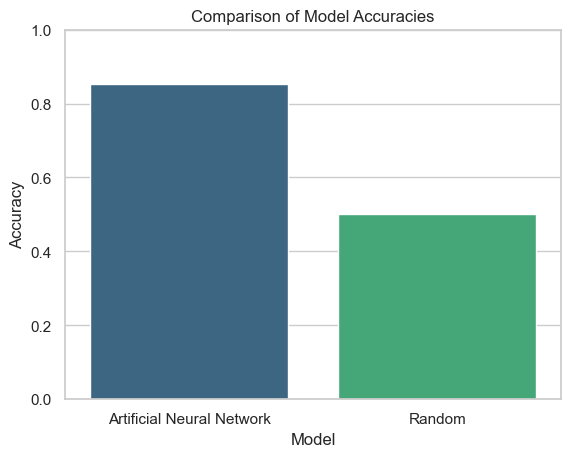

In [175]:
model_names = ['Artificial Neural Network', 'Random']
accuracies = [accuracy_ann.item(), accuracy_random]

data = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

ax = sns.barplot(x='Model', y='Accuracy', data=data, hue='Model', palette='viridis', legend=False)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')

ax.set_ylim(0, 1)

plt.show()